In [1]:
import FinanceDataset as fds
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

import matplotlib.pyplot as plt 
from mplfinance.original_flavor import candlestick_ohlc 
import pandas as pd 
import matplotlib.dates as mpl_dates 
import numpy as np 
import datetime 

/home/waterbird/.local/lib/python3.10/site-packages/bs4/css.py:8: UserWarning: The soupsieve package is not installed. CSS selectors cannot be used.
  warnings.warn(


In [368]:
df = fdr.DataReader('005930','2023-04-01','2023-07-15')
df["Date"] = df.index
df

,Open,High,Low,Close,Volume,Change,Date
Date,,,,,,,
2023-04-03,64000,64000,63000,63100,11973133,-0.014062,2023-04-03
2023-04-04,63400,63800,62800,63600,11120514,0.007924,2023-04-04
2023-04-05,63700,64000,63400,63900,9176149,0.004717,2023-04-05
2023-04-06,63500,63600,62300,62300,14992747,-0.025039,2023-04-06
2023-04-07,63800,65200,63800,65000,27476120,0.043339,2023-04-07
...,...,...,...,...,...,...,...
2023-07-10,70000,70400,69200,69500,11713926,-0.005722,2023-07-10
2023-07-11,70200,71500,70100,71500,12177392,0.028777,2023-07-11
2023-07-12,71200,72000,71100,71900,10375581,0.005594,2023-07-12


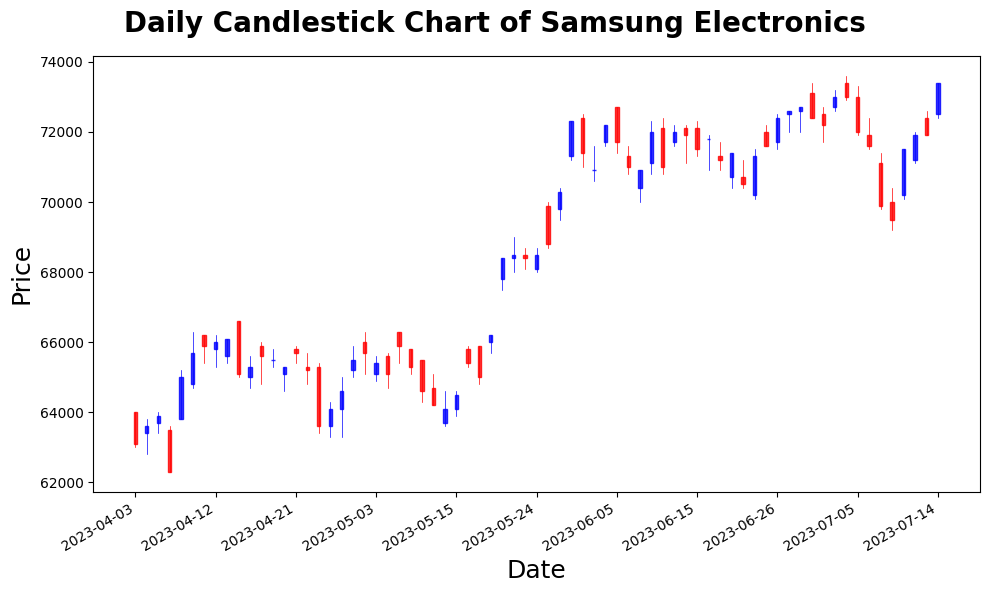

In [370]:
# Extracting Data for plotting 
# ohlc = df.tail(50).loc[:, ['Open', 'High', 'Low', 'Close']] 
ohlc = df.loc[:, ['Open', 'High', 'Low', 'Close']]

# Converting date into datetime format 
# ohlc['Date'] = pd.to_datetime(ohlc['Date']) 
# ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num) 
ohlc = ohlc.astype(float) 
dohlc = np.hstack((np.reshape(np.arange(len(ohlc.index)), (-1, 1)), ohlc))


# Creating Subplots 
fig, ax = plt.subplots(figsize=(10,6)) 
  
candlestick_ohlc(ax, dohlc, width=0.3, 
                 colorup='blue', colordown='red', alpha=0.8) 
  
# Setting labels & titles 
ax.set_xlabel('Date', fontsize=18) 
ax.set_ylabel('Price', fontsize=18) 
fig.suptitle('Daily Candlestick Chart of Samsung Electronics', fontsize=20, fontweight='bold') 
  
import datetime
_xticks = []
_xlabels = []
_wd_prev = 0

  
# Formatting Date 
# date_format = mpl_dates.DateFormatter('%d-%m-%Y') 
# ax.xaxis.set_major_formatter(date_format) 
# ax.set_xlabels(df.tail(50).loc[:, ['Date']])
ax.set_xticks(np.arange(len(df.index))[::7])
ax.set_xticklabels(df.loc[:, ['Date']].astype(str).values.reshape(-1)[::7])
fig.autofmt_xdate() 
  
fig.tight_layout() 
  
plt.show() 

In [350]:
Actual_low = np.load('graph_actual_high.npy').reshape(-1)
Actual_high = np.load('graph_actual_low.npy').reshape(-1)

Predict_low = np.load('graph_predict_low.npy').reshape(-1)
Predict_high = np.load('graph_predict_high.npy').reshape(-1)

Predict_low, Predict_high = Predict_high, Predict_low

/tmp/ipykernel_11568/3684284134.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(fontsize=13, labels=[50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])


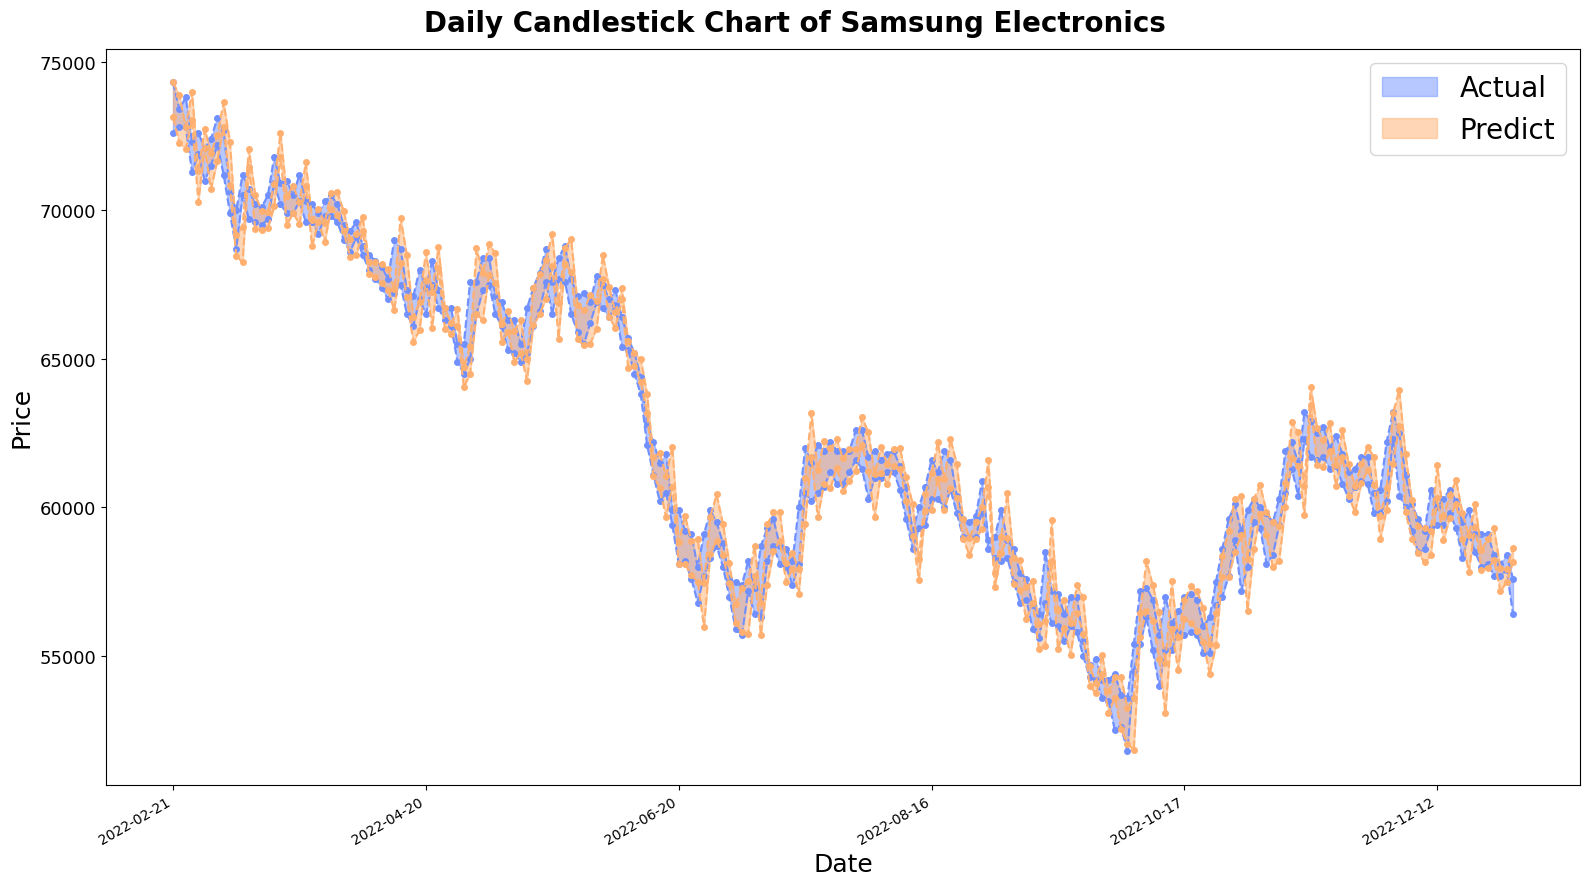

In [361]:
Highest = dohlc[:,2]
Lowest = dohlc[:,3]

fig, ax = plt.subplots(figsize=(16,9))

# candlestick_ohlc(ax, dohlc, width=0.3, colorup='blue', colordown='red', alpha=0.8) 
# "#FFB070"
ax.plot(np.arange(len(df.index)), Actual_high, marker="o", markersize=4,linestyle='--', color='#7090FF')
ax.plot(np.arange(len(df.index)), Actual_low, marker="o", markersize=4,linestyle='--', color='#7090FF')
ax.plot(np.arange(len(df.index)), Predict_low, marker="o", markersize=4,linestyle='--', color='#FFB070')
ax.plot(np.arange(len(df.index)), Predict_high, marker="o", markersize=4,linestyle='--', color='#FFB070')
ax.fill_between(np.arange(len(df.index)), Actual_high, Actual_low, alpha=0.5, color='#7090FF', label='Actual')
ax.fill_between(np.arange(len(df.index)), Predict_high, Predict_low, alpha=0.5, color='#FFB070', label='Predict')

# Setting labels & titles 
ax.set_xlabel('Date', fontsize=18) 
ax.set_ylabel('Price', fontsize=18) 
fig.suptitle('Daily Candlestick Chart of Samsung Electronics', fontsize=20, fontweight='bold') 

ax.set_xticks(np.arange(len(df.index))[::40])
ax.set_xticklabels(df.loc[:, ['Date']].astype(str).values.reshape(-1)[::40])
ax.set_yticklabels(fontsize=13, labels=[50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])
fig.autofmt_xdate() 

fig.tight_layout() 
ax.legend(fontsize=20)
plt.show()

/tmp/ipykernel_11568/3158620927.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(fontsize=10, labels=[50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])
/tmp/ipykernel_11568/3158620927.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(fontsize=10, labels=[50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])


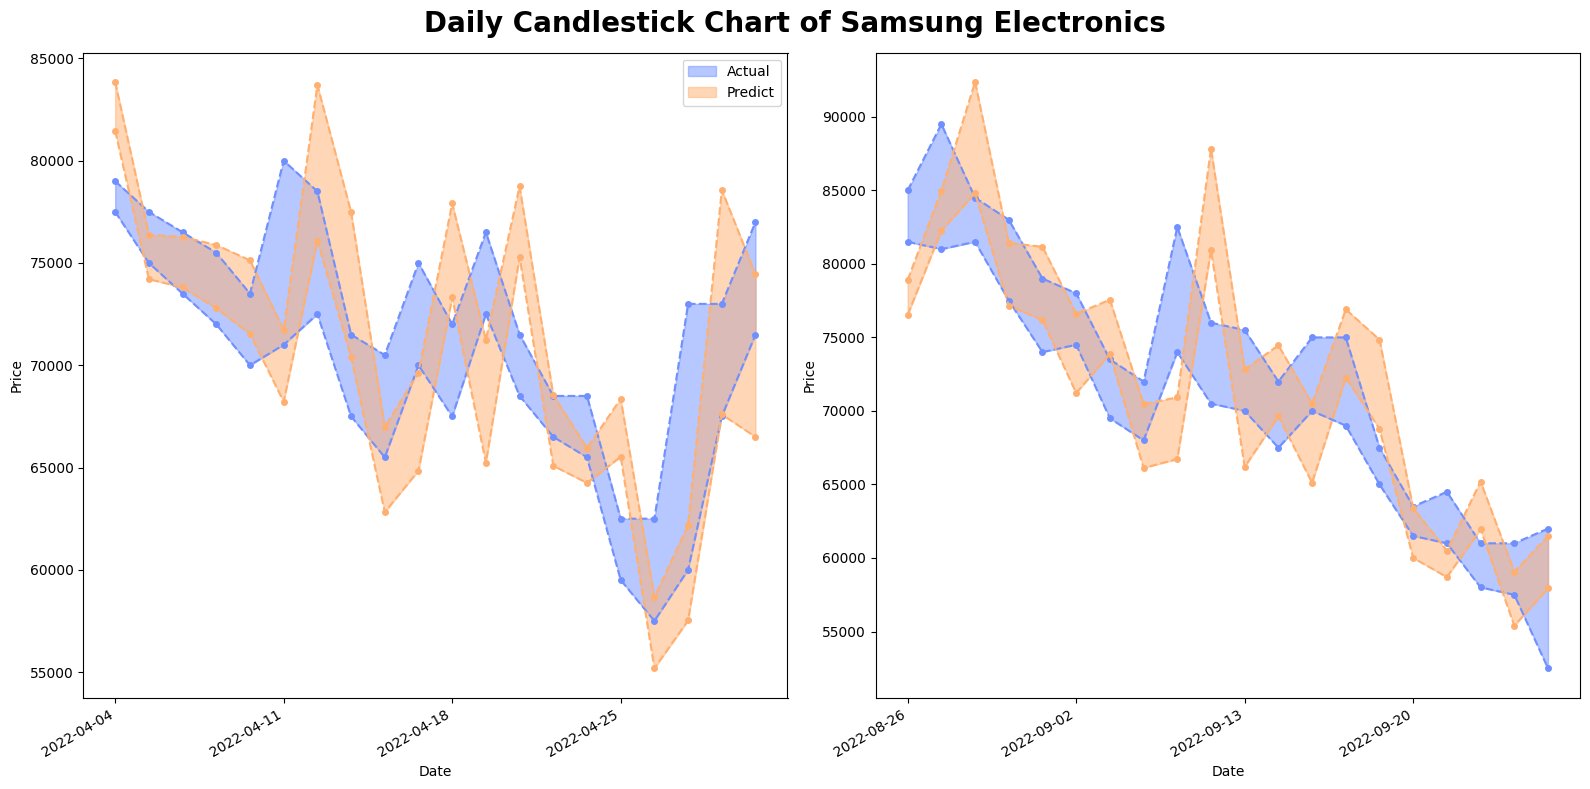

In [352]:
Highest = dohlc[:,2]
Lowest = dohlc[:,3]

fig, ax = plt.subplots(1,2,figsize=(16,8))

# candlestick_ohlc(ax, dohlc, width=0.3, colorup='blue', colordown='red', alpha=0.8) 
# "#FFB070"
ax[0].plot(np.arange(len(df.index))[30:50], Actual_high[30:50], marker="o", markersize=4,linestyle='--', color='#7090FF')
ax[0].plot(np.arange(len(df.index))[30:50], Actual_low[30:50], marker="o", markersize=4,linestyle='--', color='#7090FF')
ax[0].plot(np.arange(len(df.index))[30:50], Predict_low[30:50], marker="o", markersize=4,linestyle='--', color='#FFB070')
ax[0].plot(np.arange(len(df.index))[30:50], Predict_high[30:50], marker="o", markersize=4,linestyle='--', color='#FFB070')
ax[0].fill_between(np.arange(len(df.index))[30:50], Actual_high[30:50], Actual_low[30:50], alpha=0.5, color='#7090FF', label='Actual')
ax[0].fill_between(np.arange(len(df.index))[30:50], Predict_high[30:50], Predict_low[30:50], alpha=0.5, color='#FFB070', label='Predict')

# Setting labels & titles 
ax[0].set_xlabel('Date', fontsize=10) 
ax[0].set_ylabel('Price', fontsize=10) 
fig.suptitle('Daily Candlestick Chart of Samsung Electronics', fontsize=20, fontweight='bold') 

ax[0].set_xticks(np.arange(len(df.index))[30:50:5])
ax[0].set_xticklabels(df.loc[:, ['Date']].astype(str).values.reshape(-1)[30:50:5])
ax[0].set_yticklabels(fontsize=10, labels=[50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])


ax[1].plot(np.arange(len(df.index))[130:150], Actual_high[130:150], marker="o", markersize=4,linestyle='--', color='#7090FF')
ax[1].plot(np.arange(len(df.index))[130:150], Actual_low[130:150], marker="o", markersize=4,linestyle='--', color='#7090FF')
ax[1].plot(np.arange(len(df.index))[130:150], Predict_low[130:150], marker="o", markersize=4,linestyle='--', color='#FFB070')
ax[1].plot(np.arange(len(df.index))[130:150], Predict_high[130:150], marker="o", markersize=4,linestyle='--', color='#FFB070')
ax[1].fill_between(np.arange(len(df.index))[130:150], Actual_high[130:150], Actual_low[130:150], alpha=0.5, color='#7090FF', label='Actual')
ax[1].fill_between(np.arange(len(df.index))[130:150], Predict_high[130:150], Predict_low[130:150], alpha=0.5, color='#FFB070', label='Predict')

# Setting labels & titles 
ax[1].set_xlabel('Date', fontsize=10) 
ax[1].set_ylabel('Price', fontsize=10) 
fig.suptitle('Daily Candlestick Chart of Samsung Electronics', fontsize=20, fontweight='bold') 

ax[1].set_xticks(np.arange(len(df.index))[130:150:5])
ax[1].set_xticklabels(df.loc[:, ['Date']].astype(str).values.reshape(-1)[130:150:5])
ax[1].set_yticklabels(fontsize=10, labels=[50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])

fig.autofmt_xdate() 
  
fig.tight_layout() 
ax[0].legend(fontsize=10)
plt.show() 

In [353]:
Actual_high[30:50].shape, np.arange(len(df.index))[30:50].shape

((20,), (20,))

/tmp/ipykernel_11568/3042094884.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(fontsize=10, labels=[50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])


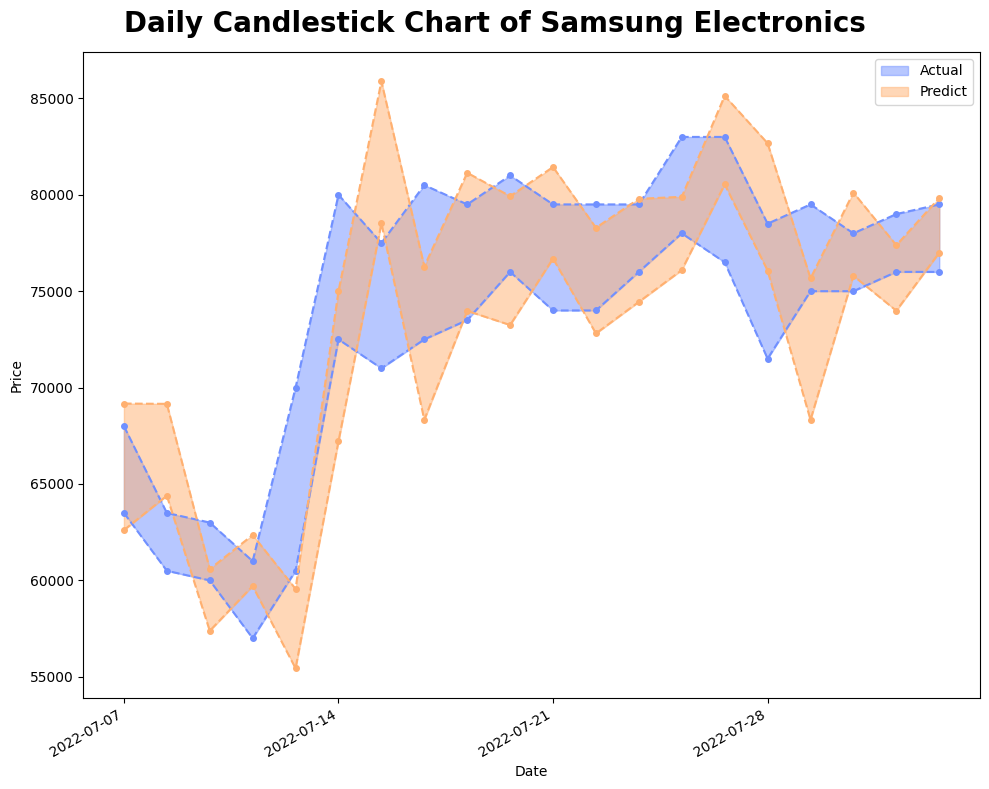

In [357]:
Highest = dohlc[:,2]
Lowest = dohlc[:,3]

fig, ax = plt.subplots(figsize=(10,8))

# candlestick_ohlc(ax, dohlc, width=0.3, colorup='blue', colordown='red', alpha=0.8) 
# "#FFB070"
ax.plot(np.arange(len(df.index))[95:115], Actual_high[95:115], marker="o", markersize=4,linestyle='--', color='#7090FF')
ax.plot(np.arange(len(df.index))[95:115], Actual_low[95:115], marker="o", markersize=4,linestyle='--', color='#7090FF')
ax.plot(np.arange(len(df.index))[95:115], Predict_low[95:115], marker="o", markersize=4,linestyle='--', color='#FFB070')
ax.plot(np.arange(len(df.index))[95:115], Predict_high[95:115], marker="o", markersize=4,linestyle='--', color='#FFB070')
ax.fill_between(np.arange(len(df.index))[95:115], Actual_high[95:115], Actual_low[95:115], alpha=0.5, color='#7090FF', label='Actual')
ax.fill_between(np.arange(len(df.index))[95:115], Predict_high[95:115], Predict_low[95:115], alpha=0.5, color='#FFB070', label='Predict')

# Setting labels & titles 
ax.set_xlabel('Date', fontsize=10) 
ax.set_ylabel('Price', fontsize=10) 
fig.suptitle('Daily Candlestick Chart of Samsung Electronics', fontsize=20, fontweight='bold') 

ax.set_xticks(np.arange(len(df.index))[95:115:5])
ax.set_xticklabels(df.loc[:, ['Date']].astype(str).values.reshape(-1)[95:115:5])
ax.set_yticklabels(fontsize=10, labels=[50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000])

fig.autofmt_xdate() 
  
fig.tight_layout() 
ax.legend(fontsize=10)
plt.show() 

<function matplotlib.pyplot.show(close=None, block=None)>

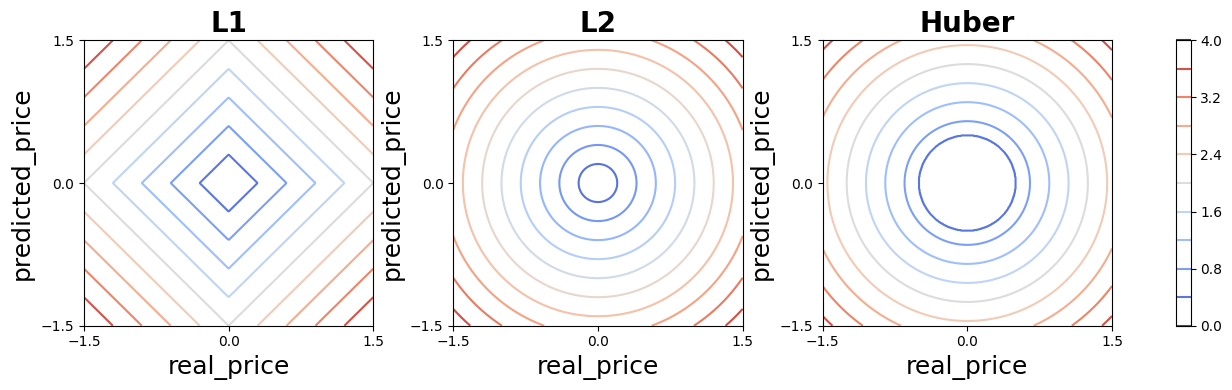

In [331]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))

x_range = np.linspace(-1.5,1.5, 500)
y_range = np.linspace(-1.5,1.5, 500)
X, Y = np.meshgrid(x_range, y_range)

L1 = ( np.abs(X) + np.abs(Y))
L2 = (np.sqrt(X**2 + Y**2))
R = np.sqrt(X**2 + Y**2)
Huber = np.where(R<0.5, 0.5*R**2, 2*(R - 1/4))
Huber = (Huber)

vmax = np.max([L1.max(), L2.max(), Huber.max()])
vmin = np.min([L1.min(), L2.min(), Huber.min()])
levels = np.linspace(vmin, vmax, 1000)

ax[0].contour(X,Y, L1, cmap='coolwarm', levels=10)
ax[0].set_title('L1', fontsize=20, fontweight='bold')
ax[0].set_xlabel('real_price', fontsize=18)
ax[0].set_ylabel('predicted_price', fontsize=18)
ax[0].set_xticks([-1.5,0,1.5])
ax[0].set_yticks([-1.5,0,1.5])

ax[1].contour(X,Y, L2, cmap='coolwarm', levels=10)
ax[1].set_title('L2', fontsize=20, fontweight='bold')
ax[1].set_xlabel('real_price', fontsize=18)
ax[1].set_ylabel('predicted_price', fontsize=18)
ax[1].set_xticks([-1.5,0,1.5])
ax[1].set_yticks([-1.5,0,1.5])

im = ax[2].contour(X,Y, Huber, cmap='coolwarm', levels=10)
ax[2].set_title('Huber', fontsize=20, fontweight='bold')
ax[2].set_xlabel('real_price', fontsize=18)
ax[2].set_ylabel('predicted_price', fontsize=18)
ax[2].set_xticks([-1.5,0,1.5])
ax[2].set_yticks([-1.5,0,1.5])

fig.tight_layout()
fig.colorbar(im, ax=ax, orientation='vertical')
plt.show